In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt
import datetime

tf.set_random_seed(7)

In [2]:
datetime.datetime.today()

datetime.datetime(2017, 8, 17, 16, 33, 55, 846137)

In [3]:
datetime.datetime(2017,8,15).weekday()

1

In [4]:
datetime.datetime.strptime('January 11, 2010', '%B %d, %Y').strftime('%A')
'Monday'

'Monday'

In [5]:
date(2017,8,15).weekday()

NameError: name 'date' is not defined

In [2]:
def MinMaxScaler(data):
    numerator=data-np.min(data)
    denominator=np.max(data)-np.min(data)
    return numerator/(denominator+1e-7)
#input data to be normalized
#Parameters
#-------------
#data: numpy.ndarray
#      shape: [Batch size, dimension]

#Returns
#--------------
#data: numpy.ndarray
#      normalized data
#      shape [Batch size, dimension]

In [3]:
#load data
#year(3), month(4), day of week(6)
xy=np.genfromtxt('./data/201701-201701빵판매량.csv', delimiter=',')[2779:,[3,4,6,1]]

#train parameters
seq_length=7
data_dim=4
hidden_dim=10
output_dim=1
learning_rate=0.01
iterations=500

In [4]:
xy

array([[  2.01600000e+03,   1.00000000e+00,   6.00000000e+00,
          3.40000000e+01],
       [  2.01600000e+03,   1.00000000e+00,   7.00000000e+00,
          4.10000000e+01],
       [  2.01600000e+03,   1.00000000e+00,   1.00000000e+00,
          5.40000000e+01],
       ..., 
       [  2.01700000e+03,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00],
       [  2.01700000e+03,   1.00000000e+00,   2.00000000e+00,
          5.00000000e+00],
       [  2.01700000e+03,   1.00000000e+00,   3.00000000e+00,
          3.10000000e+01]])

In [5]:
#기본형식
#기본 인자로는 ds-y로 받고 
#처리함수에서 ds를 받아서 'feature 처리모듈'에서 ds에서 요일(주중, 주말), 월(계절) + 날씨와 같은 추가 요인-값을 받는다.

In [6]:
#입력 데이터 위한 하드코딩
#ds

#요일

#월

#y

In [7]:
xy[:,3]=MinMaxScaler(xy[:,3])

In [8]:
x=xy
y=xy[:,[-1]]

In [9]:
#build a dataset
dataX=[]
dataY=[]
for i in range(0, len(y)-seq_length):
    _x=x[i:i+seq_length]
    _y=y[i+seq_length]
    print(_x,"->",_y)
    dataX.append(_x)
    dataY.append(_y)

[[  2.01600000e+03   1.00000000e+00   6.00000000e+00   5.96491228e-02]
 [  2.01600000e+03   1.00000000e+00   7.00000000e+00   7.19298245e-02]
 [  2.01600000e+03   1.00000000e+00   1.00000000e+00   9.47368421e-02]
 [  2.01600000e+03   1.00000000e+00   2.00000000e+00   7.19298245e-02]
 [  2.01600000e+03   1.00000000e+00   3.00000000e+00   6.14035088e-02]
 [  2.01600000e+03   1.00000000e+00   4.00000000e+00   7.71929824e-02]
 [  2.01600000e+03   1.00000000e+00   5.00000000e+00   8.77192982e-02]] -> [ 0.07368421]
[[  2.01600000e+03   1.00000000e+00   7.00000000e+00   7.19298245e-02]
 [  2.01600000e+03   1.00000000e+00   1.00000000e+00   9.47368421e-02]
 [  2.01600000e+03   1.00000000e+00   2.00000000e+00   7.19298245e-02]
 [  2.01600000e+03   1.00000000e+00   3.00000000e+00   6.14035088e-02]
 [  2.01600000e+03   1.00000000e+00   4.00000000e+00   7.71929824e-02]
 [  2.01600000e+03   1.00000000e+00   5.00000000e+00   8.77192982e-02]
 [  2.01600000e+03   1.00000000e+00   6.00000000e+00   7.36

 [  2.01600000e+03   2.00000000e+00   1.00000000e+00   8.42105263e-02]] -> [ 0.08421053]
[[  2.01600000e+03   2.00000000e+00   3.00000000e+00   8.59649123e-02]
 [  2.01600000e+03   2.00000000e+00   4.00000000e+00   8.77192982e-02]
 [  2.01600000e+03   2.00000000e+00   5.00000000e+00   6.49122807e-02]
 [  2.01600000e+03   2.00000000e+00   6.00000000e+00   6.49122807e-02]
 [  2.01600000e+03   2.00000000e+00   7.00000000e+00   7.89473684e-02]
 [  2.01600000e+03   2.00000000e+00   1.00000000e+00   8.42105263e-02]
 [  2.01600000e+03   2.00000000e+00   2.00000000e+00   8.42105263e-02]] -> [ 0.06666667]
[[  2.01600000e+03   2.00000000e+00   4.00000000e+00   8.77192982e-02]
 [  2.01600000e+03   2.00000000e+00   5.00000000e+00   6.49122807e-02]
 [  2.01600000e+03   2.00000000e+00   6.00000000e+00   6.49122807e-02]
 [  2.01600000e+03   2.00000000e+00   7.00000000e+00   7.89473684e-02]
 [  2.01600000e+03   2.00000000e+00   1.00000000e+00   8.42105263e-02]
 [  2.01600000e+03   2.00000000e+00   2.0

In [10]:
# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:])

In [11]:
#input place holders
X=tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y=tf.placeholder(tf.float32, [None, 1])

In [12]:
# build a LSTM network(input: cell shape, type/ )
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

# use the last cell's output to calculate Y_pred
Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn=None)

[step: 0] loss: 30.680448532104492
[step: 1] loss: 5.203628063201904
[step: 2] loss: 3.049175500869751
[step: 3] loss: 1.854796290397644
[step: 4] loss: 1.4182394742965698
[step: 5] loss: 1.5248082876205444
[step: 6] loss: 1.9378618001937866
[step: 7] loss: 2.4305155277252197
[step: 8] loss: 2.8274669647216797
[step: 9] loss: 3.0307095050811768
[step: 10] loss: 3.018392562866211
[step: 11] loss: 2.8248648643493652
[step: 12] loss: 2.515425682067871
[step: 13] loss: 2.1644067764282227
[step: 14] loss: 1.8391951322555542
[step: 15] loss: 1.5898710489273071
[step: 16] loss: 1.4436001777648926
[step: 17] loss: 1.4033496379852295
[step: 18] loss: 1.450765609741211
[step: 19] loss: 1.552750825881958
[step: 20] loss: 1.6704719066619873
[step: 21] loss: 1.7686878442764282
[step: 22] loss: 1.8230401277542114
[step: 23] loss: 1.8237134218215942
[step: 24] loss: 1.7751117944717407
[step: 25] loss: 1.6923877000808716
[step: 26] loss: 1.5962178707122803
[step: 27] loss: 1.5072839260101318
[step: 28

[step: 253] loss: 1.402980089187622
[step: 254] loss: 1.402980089187622
[step: 255] loss: 1.402980089187622
[step: 256] loss: 1.4029803276062012
[step: 257] loss: 1.4029804468154907
[step: 258] loss: 1.4029802083969116
[step: 259] loss: 1.4029802083969116
[step: 260] loss: 1.4029799699783325
[step: 261] loss: 1.4029802083969116
[step: 262] loss: 1.4029802083969116
[step: 263] loss: 1.4029802083969116
[step: 264] loss: 1.4029799699783325
[step: 265] loss: 1.402980089187622
[step: 266] loss: 1.4029799699783325
[step: 267] loss: 1.402980089187622
[step: 268] loss: 1.402980089187622
[step: 269] loss: 1.402980089187622
[step: 270] loss: 1.4029802083969116
[step: 271] loss: 1.4029802083969116
[step: 272] loss: 1.4029802083969116
[step: 273] loss: 1.4029802083969116
[step: 274] loss: 1.402980089187622
[step: 275] loss: 1.402980089187622
[step: 276] loss: 1.402980089187622
[step: 277] loss: 1.4029799699783325
[step: 278] loss: 1.4029802083969116
[step: 279] loss: 1.4029802083969116
[step: 280]

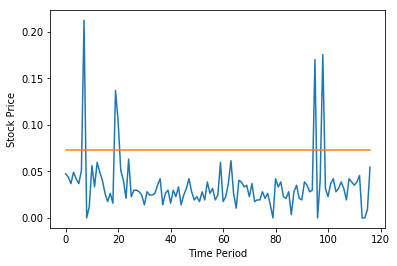

In [13]:
# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)
# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()

[step: 0] loss: 30.680448532104492
[step: 1] loss: 5.203628063201904
[step: 2] loss: 3.049175500869751
[step: 3] loss: 1.854796290397644
[step: 4] loss: 1.4182394742965698
[step: 5] loss: 1.5248082876205444
[step: 6] loss: 1.9378618001937866
[step: 7] loss: 2.4305155277252197
[step: 8] loss: 2.8274669647216797
[step: 9] loss: 3.0307095050811768
[step: 10] loss: 3.018392562866211
[step: 11] loss: 2.8248648643493652
[step: 12] loss: 2.515425682067871
[step: 13] loss: 2.1644067764282227
[step: 14] loss: 1.8391951322555542
[step: 15] loss: 1.5898710489273071
[step: 16] loss: 1.4436001777648926
[step: 17] loss: 1.4033496379852295
[step: 18] loss: 1.450765609741211
[step: 19] loss: 1.552750825881958
[step: 20] loss: 1.6704719066619873
[step: 21] loss: 1.7686878442764282
[step: 22] loss: 1.8230401277542114
[step: 23] loss: 1.8237134218215942
[step: 24] loss: 1.7751117944717407
[step: 25] loss: 1.6923877000808716
[step: 26] loss: 1.5962178707122803
[step: 27] loss: 1.5072839260101318
[step: 28

[step: 257] loss: 1.4029804468154907
[step: 258] loss: 1.4029802083969116
[step: 259] loss: 1.4029802083969116
[step: 260] loss: 1.4029799699783325
[step: 261] loss: 1.4029802083969116
[step: 262] loss: 1.4029802083969116
[step: 263] loss: 1.4029802083969116
[step: 264] loss: 1.4029799699783325
[step: 265] loss: 1.402980089187622
[step: 266] loss: 1.4029799699783325
[step: 267] loss: 1.402980089187622
[step: 268] loss: 1.402980089187622
[step: 269] loss: 1.402980089187622
[step: 270] loss: 1.4029802083969116
[step: 271] loss: 1.4029802083969116
[step: 272] loss: 1.4029802083969116
[step: 273] loss: 1.4029802083969116
[step: 274] loss: 1.402980089187622
[step: 275] loss: 1.402980089187622
[step: 276] loss: 1.402980089187622
[step: 277] loss: 1.4029799699783325
[step: 278] loss: 1.4029802083969116
[step: 279] loss: 1.4029802083969116
[step: 280] loss: 1.4029802083969116
[step: 281] loss: 1.4029802083969116
[step: 282] loss: 1.4029799699783325
[step: 283] loss: 1.402980089187622
[step: 28

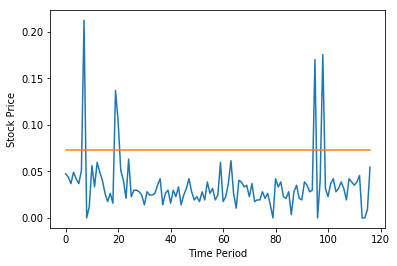

In [14]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()